In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

In [58]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [8]:
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Find the most recent date in the data set.
final_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

final_date

('2017-08-23',)

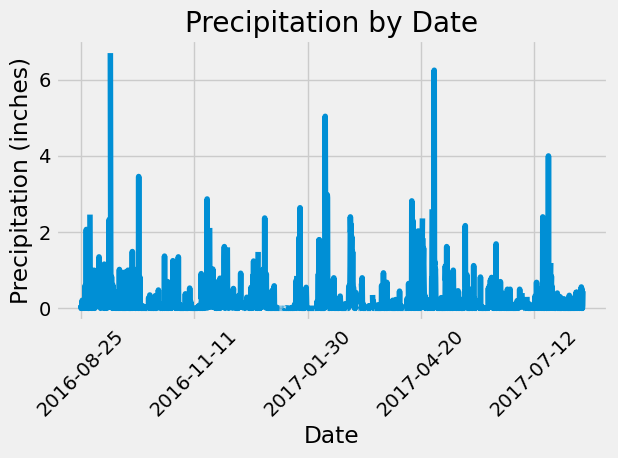

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(weeks=52)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(results, columns=["Date","Precipitation"])

# Sort the dataframe by date
new_prcp = prcp_df.sort_values(by="Date")
new_prcp_df = new_prcp.set_index("Date")
# Use Pandas Plotting with Matplotlib to plot the data
fig1 = new_prcp_df["Precipitation"].plot(
                    x='Date',
                    y='Precipitation',
                    grid=True,
                    title='Precipitation by Date',
                    xlabel='Date',
                    rot=45,
                    ylabel='Precipitation (inches)')

plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data

prcp_df.describe()

,Precipitation
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
station_count

9

In [13]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_rows = session.query(Measurement.station,func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
station_rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_count = session.query(Measurement.station,func.count(Measurement.station)).\
                                    group_by(Measurement.station).\
                                    order_by(func.count(Measurement.station).desc()).first()
active_station = active_station_count[0]
active_temp_obs = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                    filter(Measurement.station == active_station).all()
active_temp_obs

[(54.0, 85.0, 71.66378066378067)]

In [71]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the data
tobs_results = session.query(Measurement.tobs).\
                             filter(Measurement.station == active_station).\
                             filter(Measurement.date > year_ago).all()

results = []
for result in tobs_results:
    print(result.tobs)
    results.append(result.tobs)

80.0
80.0
75.0
73.0
78.0
77.0
78.0
80.0
80.0
78.0
78.0
78.0
73.0
74.0
80.0
79.0
77.0
80.0
76.0
79.0
75.0
79.0
78.0
79.0
78.0
78.0
76.0
74.0
77.0
78.0
79.0
79.0
77.0
80.0
78.0
78.0
78.0
77.0
79.0
79.0
79.0
79.0
75.0
76.0
73.0
72.0
71.0
77.0
79.0
78.0
79.0
77.0
79.0
77.0
78.0
78.0
78.0
78.0
77.0
74.0
75.0
76.0
73.0
76.0
74.0
77.0
76.0
76.0
74.0
75.0
75.0
75.0
75.0
71.0
63.0
70.0
68.0
67.0
77.0
74.0
77.0
76.0
76.0
75.0
76.0
75.0
73.0
75.0
73.0
75.0
74.0
75.0
74.0
75.0
73.0
75.0
73.0
73.0
74.0
70.0
72.0
70.0
67.0
67.0
69.0
70.0
68.0
69.0
69.0
66.0
65.0
68.0
62.0
75.0
70.0
69.0
76.0
76.0
74.0
73.0
71.0
74.0
74.0
72.0
71.0
72.0
74.0
69.0
67.0
72.0
70.0
64.0
63.0
63.0
62.0
70.0
70.0
62.0
62.0
63.0
65.0
69.0
77.0
70.0
74.0
69.0
72.0
71.0
69.0
71.0
71.0
72.0
72.0
69.0
70.0
66.0
65.0
69.0
68.0
68.0
68.0
59.0
60.0
70.0
73.0
75.0
64.0
59.0
59.0
62.0
68.0
70.0
73.0
79.0
75.0
65.0
70.0
74.0
70.0
70.0
71.0
71.0
71.0
69.0
61.0
67.0
65.0
72.0
71.0
73.0
72.0
77.0
73.0
67.0
62.0
64.0
67.0
66.0
81.0
69.0


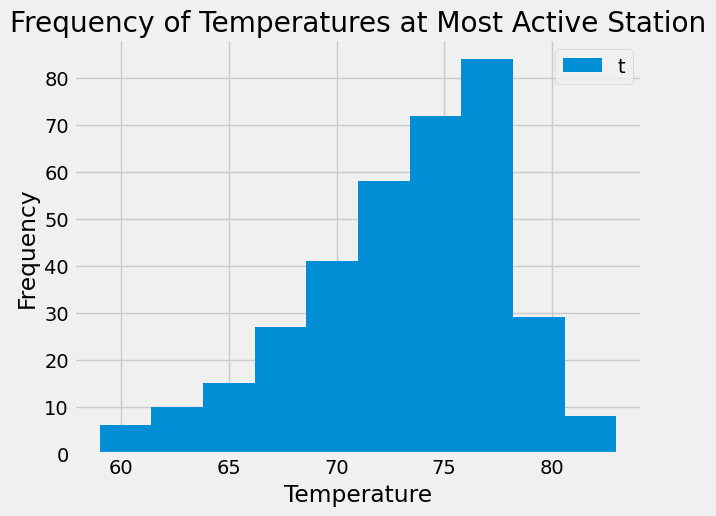

In [78]:
# plot the data as a histogram
plt.hist(results)
plt.tight_layout()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")
plt.title("Frequency of Temperatures at Most Active Station")
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()